In [36]:
import os
import gc
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
labels_df = pd.read_csv('input/train.csv')
labels_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [15]:
#Print all unoique tags
from itertools import chain
labels_list = list(chain.from_iterable([tags.split(" ") for tags in labels_df['tags'].values]))
labels_set = set(labels_list)
print("There is {} unique labels including {}".format(len(labels_set), labels_set))

There is 17 unique labels including {'road', 'partly_cloudy', 'cloudy', 'conventional_mine', 'water', 'artisinal_mine', 'haze', 'habitation', 'agriculture', 'primary', 'slash_burn', 'clear', 'bare_ground', 'blooming', 'cultivation', 'blow_down', 'selective_logging'}


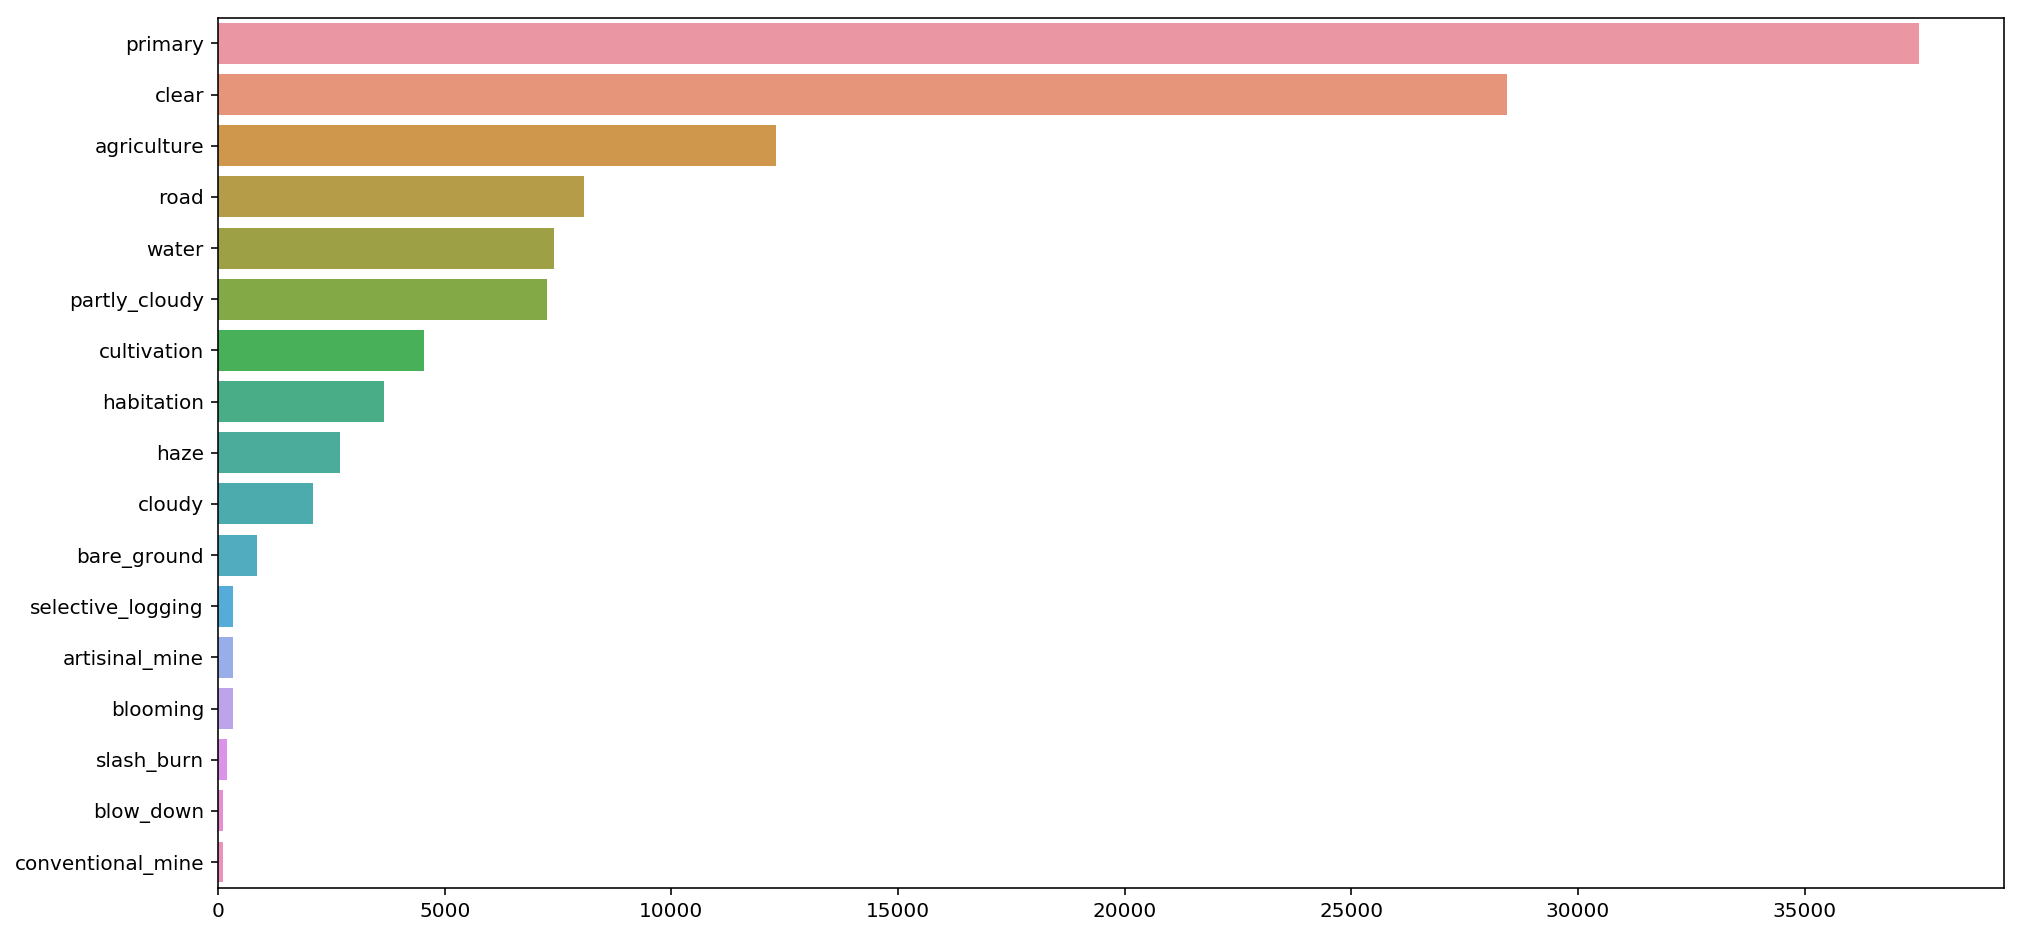

In [20]:
#Histogram of label instances

labels_s = pd.Series(labels_list).value_counts() # To sort them by count
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=labels_s, y=labels_s.index, orient='h')

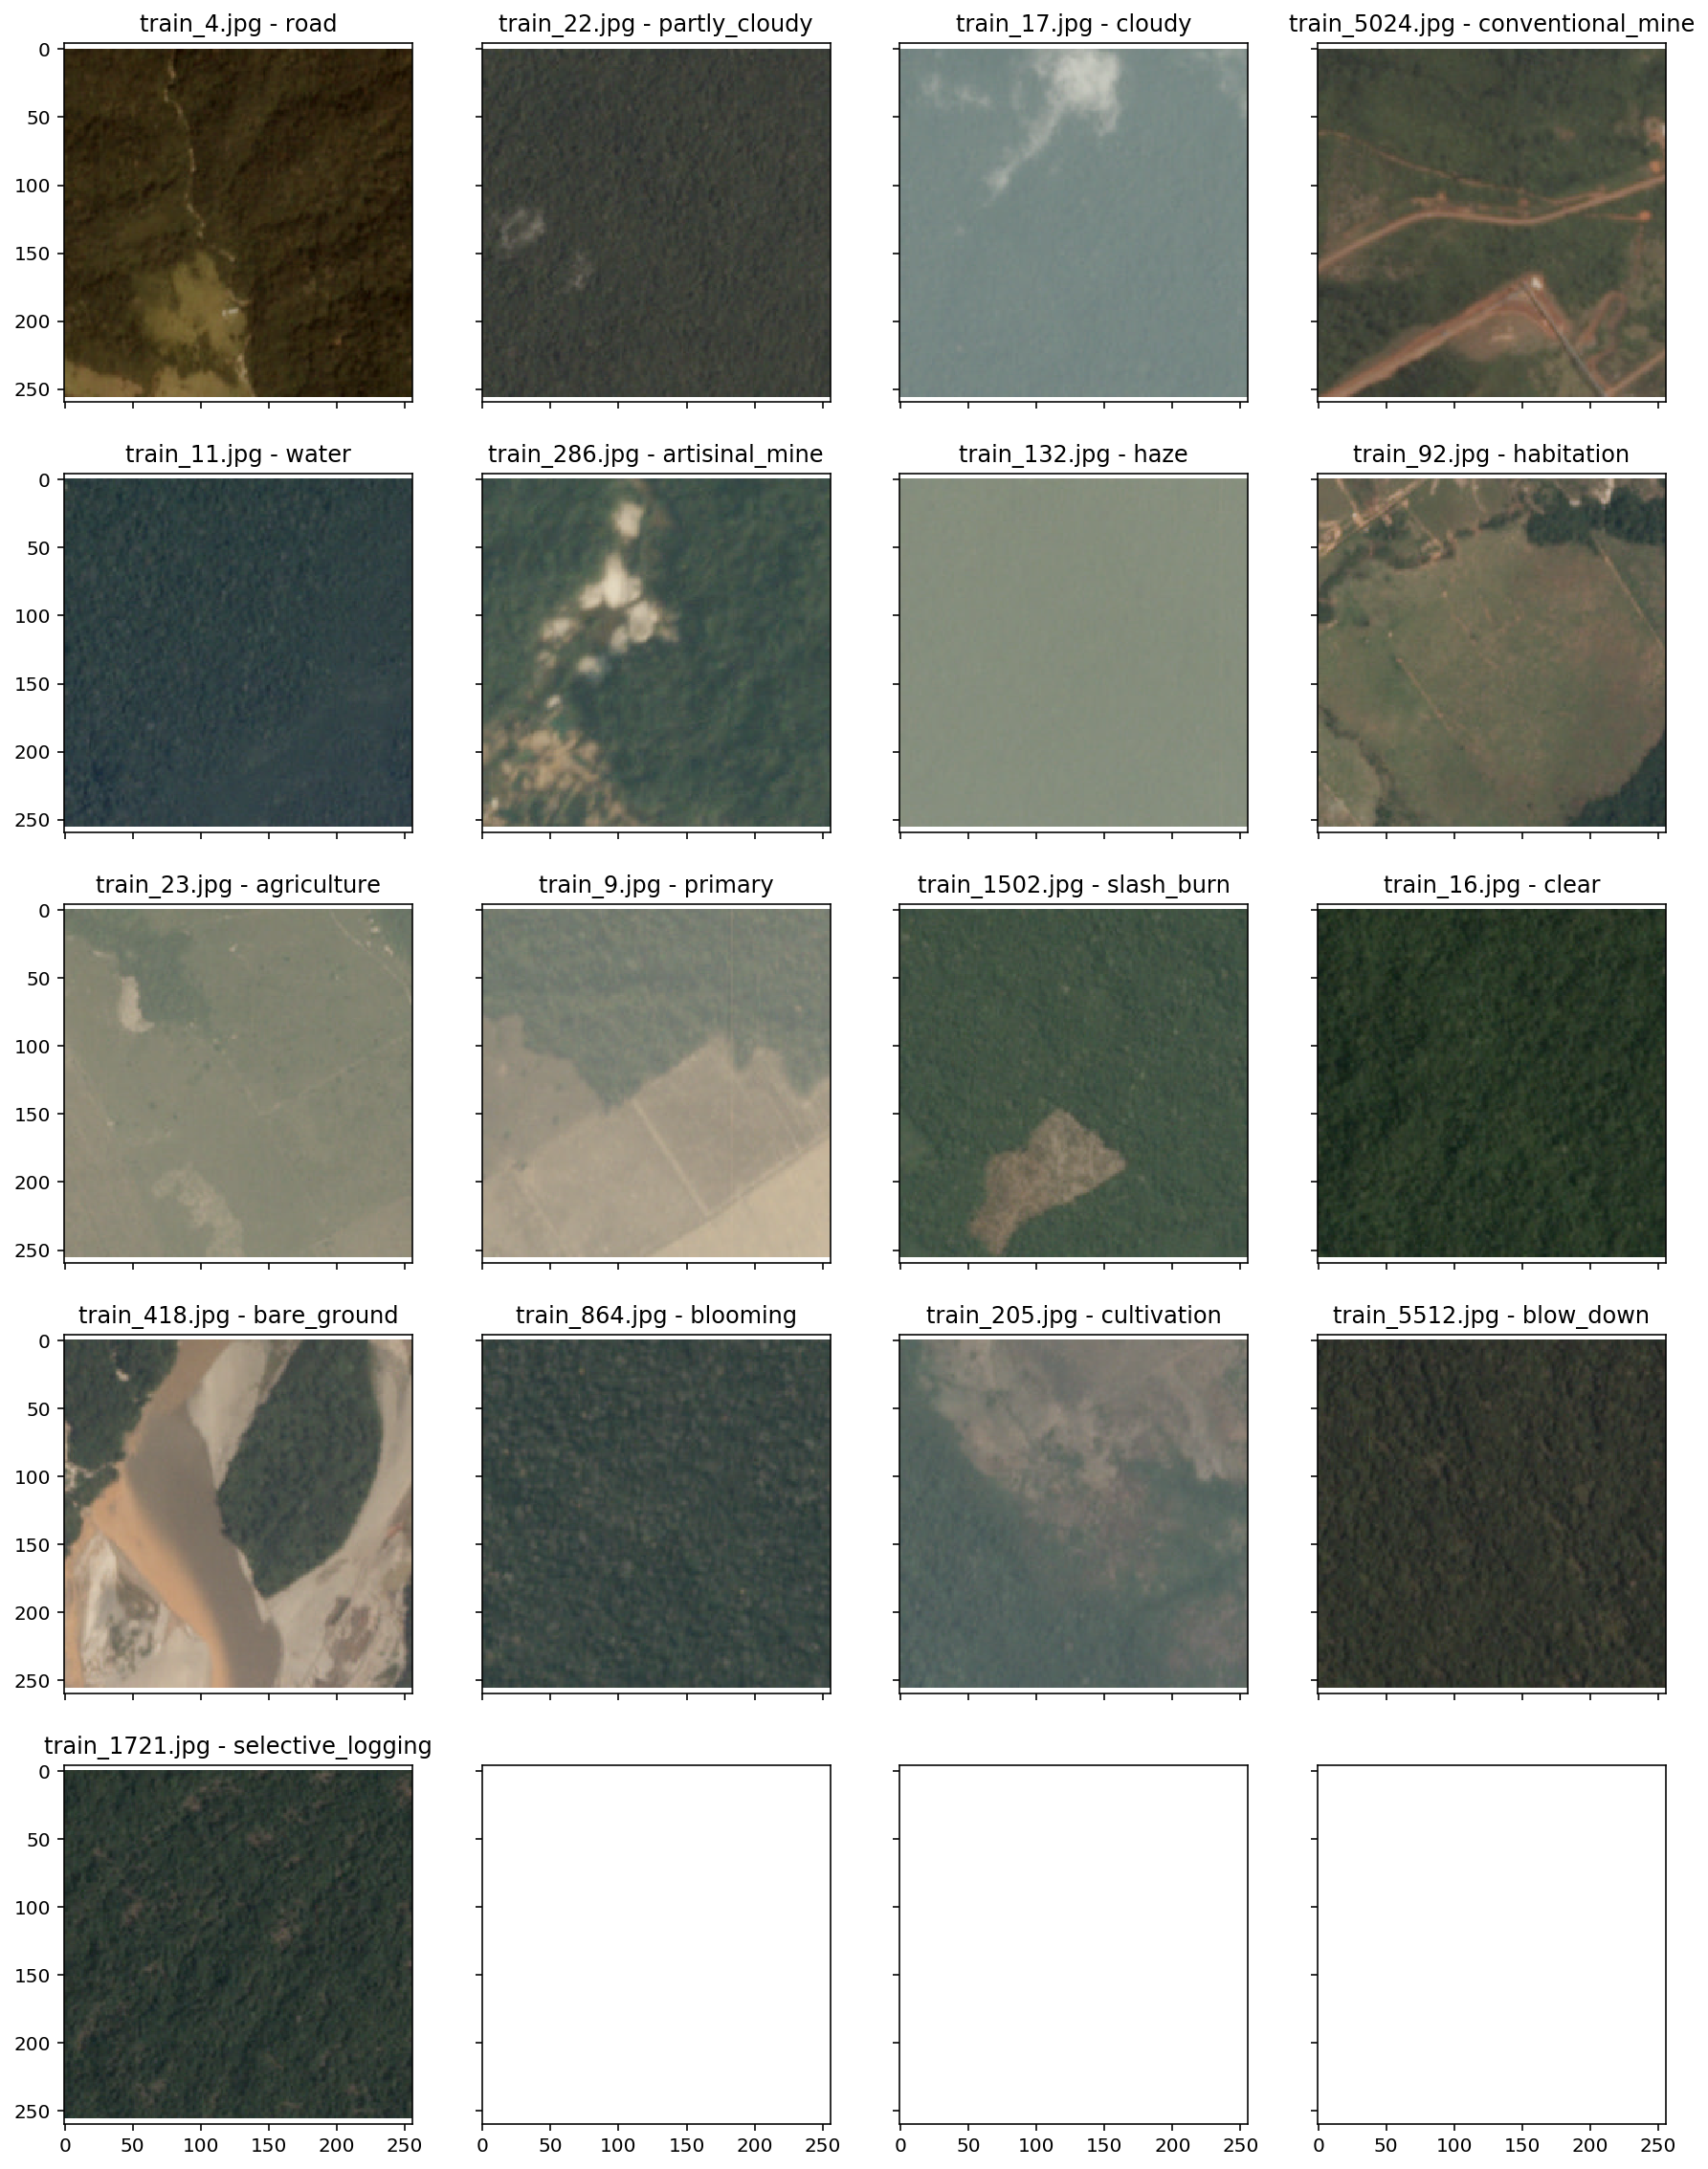

In [32]:
## Images
#Visualize some chip images to know what we are dealing with.
#Lets vizualise 1 chip for the 17 images to get a sense of their differences.

images_title = [labels_df[labels_df['tags'].str.contains(label)].iloc[i]['image_name'] + '.jpg'
                for i ,label in enumerate(labels_set)]
plt.rc('axes', grid=False)
_, axs = plt.subplots(5,4, sharex = 'col', sharey='row', figsize=(15,20))
axs = axs.ravel()

for i, (image_name, label) in enumerate(zip(images_title, labels_set)):
    img = mpimg.imread('input/train-jpg'+'/'+ image_name)
    axs[i].imshow(img)
    axs[i].set_title('{} - {}'.format(image_name,label))


In [33]:
#DEfine the hyperparameter of neural network

img_resize = (64,64)
validation_split_size = 0.2
batch_size = 128

In [34]:
x_train, y_train, y_map = data_helper.preprocess_train_data('input/train-jpeg', 'input/train.csv', img_resize)


NameError: name 'data_helper' is not defined